# Reporte de MLT de Barcelona Telco

## Problema ha solucionar


## Data

In [2]:
import time
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import numpy as np

ch = pd.read_csv('https://raw.githubusercontent.com/marcbonastre/RepoTestGroup3/master/PROYECTO_FINAL/Datasets/Telco%20Custormer%20Churn/Telco-Customer-Churn.csv',header=0)
print(ch.shape)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(7043, 21)


## Data Exploration

In [3]:
ch.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Las columnas que contiene el dataset se definen en:

* **customerID**
* **gender**: Whether the customer is a male or a female
* **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
* **Partner**: Whether the customer has a partner or not (Yes, No)
* **Dependents**: Whether the customer has dependents or not (Yes, No)
* **tenure**: Number of months the customer has stayed with the company
* **PhoneService**: Whether the customer has a phone service or not (Yes, No)
* **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) 
* **MonthlyCharges**: The amount charged to the customer monthly
* **TotalCharges**: The total amount charged to the customer
* **Churn**: Whether the customer churned or not (Yes or No)

In [4]:
print('El número de columnas y filas es de {}'.format(ch.shape))
print('y sus encabezados son: {}'.format(ch.columns))

El número de columnas y filas es de (7043, 21)
y sus encabezados son: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Ahora vamos a comprobar sihay nulos en el dataset

In [5]:
ch.isnull().values.any()

False

In [6]:
ch.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

El data set no cuenta con nulls. Ahora analizamos el tipo de dato que es cada columna

In [7]:
ch.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
chh=ch.drop(['customerID','TotalCharges'], axis=1)

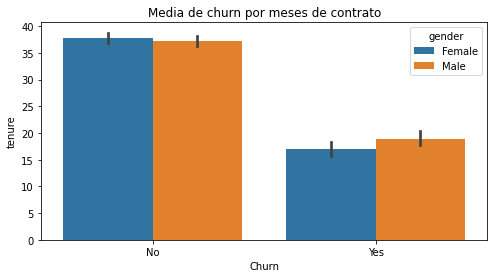

In [9]:
fig = plt.figure(figsize=(8,4))
ax1 = sns.barplot(x="Churn", y="tenure",hue="gender", data=chh)
ax1.set_title('Media de churn por meses de contrato')
plt.show()

In [10]:
chh=ch.drop(['customerID','TotalCharges'], axis=1)

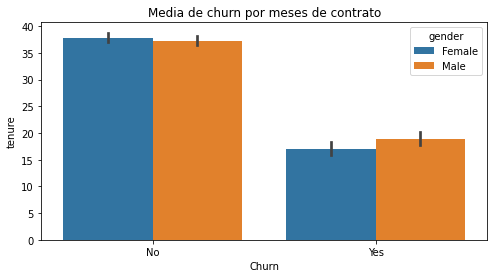

In [11]:
fig = plt.figure(figsize=(8,4))
ax1 = sns.barplot(x="Churn", y="tenure",hue="gender", data=chh)
ax1.set_title('Media de churn por meses de contrato')
plt.show()

Vemos que el sexo de la persona no varia mucho en el churn, por tanto el imapocto es muy bajo

Ahora vamos a analizar los datos que contiene cada variable

Hay muchos resultados que son Yes/No y otra respuesta tipo, vamos a analizar cuales son estas respuestas. Lo ideal sería poder convertirlas a valores enteros de 0,1,2...



In [12]:
a=chh.gender.unique()
b=chh.SeniorCitizen.unique()
c=chh.Partner.unique()
d=chh.Dependents.unique()
e=chh.tenure.unique()
f=chh.PhoneService.unique()
g=chh.MultipleLines.unique()
h=chh.InternetService.unique()
i=chh.OnlineSecurity.unique()
j=chh.OnlineBackup.unique()
k=chh.DeviceProtection.unique()
l=chh.TechSupport.unique()
m=chh.StreamingTV.unique()
n=chh.StreamingMovies.unique()
o=chh.Contract.unique()
p=chh.PaperlessBilling.unique()
q=chh.PaymentMethod.unique()
r=chh.MonthlyCharges.unique()
s=chh.Churn.unique()

print('los datos unicos de gender es de {}'.format(a))
print('los datos unicos de SeniorCitizen es de {}'.format(b))
print('los datos unicos de Partner es de {}'.format(c))
print('los datos unicos de Dependents es de {}'.format(d))
print('los datos unicos de tenure es de {}'.format(e))
print('los datos unicos de PhoneService es de {}'.format(f))
print('los datos unicos de MultipleLines es de {}'.format(g))
print('los datos unicos de InternetService es de {}'.format(h))
print('los datos unicos de OnlineSecurity es de {}'.format(i))
print('los datos unicos de OnlineBackup es de {}'.format(j))
print('los datos unicos de DeviceProtection es de {}'.format(k))
print('los datos unicos de TechSupport es de {}'.format(l))
print('los datos unicos de StreamingTV es de {}'.format(m))
print('los datos unicos de StreamingMovies es de {}'.format(n))
print('los datos unicos de Contract es de {}'.format(o))
print('los datos unicos de PaperlessBilling es de {}'.format(p))
print('los datos unicos de PaymentMethod es de {}'.format(q))
print('los datos unicos de MonthlyCharges es de {}'.format(r))
print('los datos unicos de Churn es de {}'.format(s))


los datos unicos de gender es de ['Female' 'Male']
los datos unicos de SeniorCitizen es de [0 1]
los datos unicos de Partner es de ['Yes' 'No']
los datos unicos de Dependents es de ['No' 'Yes']
los datos unicos de tenure es de [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
los datos unicos de PhoneService es de ['No' 'Yes']
los datos unicos de MultipleLines es de ['No phone service' 'No' 'Yes']
los datos unicos de InternetService es de ['DSL' 'Fiber optic' 'No']
los datos unicos de OnlineSecurity es de ['No' 'Yes' 'No internet service']
los datos unicos de OnlineBackup es de ['Yes' 'No' 'No internet service']
los datos unicos de DeviceProtection es de ['No' 'Yes' 'No internet service']
los datos unicos de TechSupport es de ['No' 'Yes' 'No internet service']
los datos unicos de StreamingTV es de ['No' 'Yes' 'No i

Vemos que hay mucho que son **No/Yes/No phone service/No internet service**, los "No phone service/No internet service" los vamos a convertir realmente todos a NO, ya que significan lo mismo

In [13]:
chhh = chh.replace(to_replace = ['No phone service','No internet service'],value = 'No')

In [14]:
g=chhh.MultipleLines.unique()
i=chhh.OnlineSecurity.unique()
j=chhh.OnlineBackup.unique()
k=chhh.DeviceProtection.unique()
l=chhh.TechSupport.unique()
m=chhh.StreamingTV.unique()
n=chhh.StreamingMovies.unique()

print('los datos unicos de MultipleLines es de {}'.format(g))
print('los datos unicos de OnlineSecurity es de {}'.format(i))
print('los datos unicos de OnlineBackup es de {}'.format(j))
print('los datos unicos de DeviceProtection es de {}'.format(k))
print('los datos unicos de TechSupport es de {}'.format(l))
print('los datos unicos de StreamingTV es de {}'.format(m))
print('los datos unicos de StreamingMovies es de {}'.format(n))


los datos unicos de MultipleLines es de ['No' 'Yes']
los datos unicos de OnlineSecurity es de ['No' 'Yes']
los datos unicos de OnlineBackup es de ['Yes' 'No']
los datos unicos de DeviceProtection es de ['No' 'Yes']
los datos unicos de TechSupport es de ['No' 'Yes']
los datos unicos de StreamingTV es de ['No' 'Yes']
los datos unicos de StreamingMovies es de ['No' 'Yes']


Vemos que hay mucho que son **No/Yes/No phone service/No internet service**, los "No phone service/No internet service" los vamos a convertir realmente todos a NO, ya que significan lo mismo

In [15]:
chhh = chh.replace(to_replace = ['No phone service','No internet service'],value = 'No')

In [16]:
g=chhh.MultipleLines.unique()
i=chhh.OnlineSecurity.unique()
j=chhh.OnlineBackup.unique()
k=chhh.DeviceProtection.unique()
l=chhh.TechSupport.unique()
m=chhh.StreamingTV.unique()
n=chhh.StreamingMovies.unique()

print('los datos unicos de MultipleLines es de {}'.format(g))
print('los datos unicos de OnlineSecurity es de {}'.format(i))
print('los datos unicos de OnlineBackup es de {}'.format(j))
print('los datos unicos de DeviceProtection es de {}'.format(k))
print('los datos unicos de TechSupport es de {}'.format(l))
print('los datos unicos de StreamingTV es de {}'.format(m))
print('los datos unicos de StreamingMovies es de {}'.format(n))


los datos unicos de MultipleLines es de ['No' 'Yes']
los datos unicos de OnlineSecurity es de ['No' 'Yes']
los datos unicos de OnlineBackup es de ['Yes' 'No']
los datos unicos de DeviceProtection es de ['No' 'Yes']
los datos unicos de TechSupport es de ['No' 'Yes']
los datos unicos de StreamingTV es de ['No' 'Yes']
los datos unicos de StreamingMovies es de ['No' 'Yes']


Vamos a realizar un categorical variables encoding. Las variables que tengan 2 clases, vamos a usar Label Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for x in [i for i in chhh.columns if len(chhh[i].unique())==2]:
    print(x, chhh[x].unique())
    chhh[x]= label_encoder.fit_transform(chhh[x])

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


In [18]:
[[x, chhh[x].unique()] for x in [i for i in chhh.columns if len(chh[i].unique())<10]]

[['gender', array([0, 1])],
 ['SeniorCitizen', array([0, 1])],
 ['Partner', array([1, 0])],
 ['Dependents', array([0, 1])],
 ['PhoneService', array([0, 1])],
 ['MultipleLines', array([0, 1])],
 ['InternetService', array(['DSL', 'Fiber optic', 'No'], dtype=object)],
 ['OnlineSecurity', array([0, 1])],
 ['OnlineBackup', array([1, 0])],
 ['DeviceProtection', array([0, 1])],
 ['TechSupport', array([0, 1])],
 ['StreamingTV', array([0, 1])],
 ['StreamingMovies', array([0, 1])],
 ['Contract', array(['Month-to-month', 'One year', 'Two year'], dtype=object)],
 ['PaperlessBilling', array([1, 0])],
 ['PaymentMethod',
  array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
         'Credit card (automatic)'], dtype=object)],
 ['Churn', array([0, 1])]]

con los que no son de dos valores, vamos a hacerlo manualmente

In [19]:
labelEncoder = LabelEncoder()
print(chhh["InternetService"].value_counts())
chhh["InternetService"] = labelEncoder.fit_transform(chhh["InternetService"])
chhh["InternetService"].value_counts()

print(chhh["Contract"].value_counts())
chhh["Contract"] = labelEncoder.fit_transform(chhh["Contract"])
chhh["Contract"].value_counts()

print(chhh["PaymentMethod"].value_counts())
chhh["PaymentMethod"] = labelEncoder.fit_transform(chhh["PaymentMethod"])
chhh["PaymentMethod"].value_counts()

chhh.head(10)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,2,99.65,1
6,1,0,0,1,22,1,1,1,0,1,0,0,1,0,0,1,1,89.10,0
7,0,0,0,0,10,0,0,0,1,0,0,0,0,0,0,0,3,29.75,0
8,0,0,1,0,28,1,1,1,0,0,1,1,1,1,0,1,2,104.80,1
9,1,0,0,1,62,1,0,0,1,1,0,0,0,0,1,0,0,56.15,0


## Algoritmo de Machine Learning

### Con todas la features

El objetivo es ver la probabilidad de que dejen la compañía o no. 
Para ello, vamos a dividir el data set en un 80% para entreno y un 20% para test

In [20]:
from sklearn.model_selection import train_test_split
X=chhh.drop('Churn',axis=1)
y=chhh['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [21]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [22]:
X_train.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
dtype: object

In [23]:
from sklearn.ensemble import RandomForestClassifier 
RFC = RandomForestClassifier(max_depth = 7, min_samples_split = 4, n_estimators = 3000,random_state = 30, n_jobs = -1) 
RFC.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

### Reducción de features

In [24]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

print('Data shape: {}'.format(X.shape))

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1) 
# clf = tree.DecisionTreeClassifier()
rfe = RFE(estimator=svc, n_features_to_select=7, step=1)
rfe.fit(X, y)
print('Ranging features: {}'.format(rfe.ranking_))
array=[]
for i in range(len(rfe.ranking_)):
  if rfe.ranking_[i] != 1:
     array.append(X.columns[i])
new_X = X
new_X = new_X.drop(columns=array)
new_X.shape

Data shape: (7043, 18)
Ranging features: [10  1 12  3  8  5  9  6  1  1  4  1  1  2  1  1 11  7]


(7043, 7)

In [25]:
new_X

,SeniorCitizen,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,Contract,PaperlessBilling
0,0,0,1,0,0,0,1
1,0,1,0,0,0,1,0
2,0,1,1,0,0,0,1
3,0,1,0,1,0,1,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
7038,0,1,0,1,1,1,1
7039,0,0,1,0,1,1,1
7040,0,1,0,0,0,0,1
7041,1,0,0,0,0,0,1


In [26]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(new_X, y, test_size = 0.25, random_state = 0)
RFC_rf = RandomForestClassifier(max_depth = 7, min_samples_split = 4, n_estimators = 3000,random_state = 30, n_jobs = -1) 
RFC_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

## Resultados

### Con todas la features

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

train_prediction = RFC.predict(X_train)
print("La accuracy es de train es {}.".format(accuracy_score(y_train,train_prediction)))
print(classification_report(y_train, train_prediction))
score_train = RFC.score(X_train,y_train)
print('Score: {}'.format(score_train))

test_prediction = RFC.predict(X_test)
print("La accuracy es de test es {}.".format(accuracy_score(y_test,test_prediction)))
print(classification_report(y_test, test_prediction))
score_test = RFC.score(X_train,y_train)
print('Score: {}'.format(score_test))

La accuracy es de train es 0.8252555850056796.
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3876
           1       0.73      0.54      0.62      1406

    accuracy                           0.83      5282
   macro avg       0.79      0.73      0.75      5282
weighted avg       0.82      0.83      0.82      5282

Score: 0.8252555850056796
La accuracy es de test es 0.7887563884156729.
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1298
           1       0.64      0.44      0.52       463

    accuracy                           0.79      1761
   macro avg       0.73      0.68      0.69      1761
weighted avg       0.77      0.79      0.77      1761

Score: 0.8252555850056796


### Reducción de features

In [28]:
train_prediction_rf = RFC_rf.predict(X_train_rf)
print("La accuracy es de train es {}.".format(accuracy_score(y_train_rf,train_prediction_rf)))
print(classification_report(y_train_rf, train_prediction_rf))
score_train = RFC_rf.score(X_train_rf,y_train_rf)
print('Score: {}'.format(score_train))

test_prediction_rf = RFC_rf.predict(X_test_rf)
print("La accuracy es de test es {}.".format(accuracy_score(y_test_rf,test_prediction_rf)))
print(classification_report(y_test_rf, test_prediction_rf))
score_test = RFC_rf.score(X_train_rf,y_train_rf)
print('Score: {}'.format(score_test))

La accuracy es de train es 0.7692162059825823.
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      3876
           1       0.64      0.31      0.42      1406

    accuracy                           0.77      5282
   macro avg       0.71      0.62      0.64      5282
weighted avg       0.75      0.77      0.74      5282

Score: 0.7692162059825823
La accuracy es de test es 0.7535491198182851.
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      1298
           1       0.56      0.28      0.37       463

    accuracy                           0.75      1761
   macro avg       0.67      0.60      0.61      1761
weighted avg       0.72      0.75      0.72      1761

Score: 0.7692162059825823


 ## Discusión y Conclusiones

He probat el model RFC amb 10 i 9 features i dona 0.76 d'accuracy, perdem un 0.02 comparat quan tenim 18 features però crec que ens podem quedar amb menys features si nomes perdem un 0.02

Amb 7 features arribem a un 75% crec que podem deixarho aqui

## Linias de desarrollo futuro

### Annexo 1 : Guardar y/o cargar el modelo


In [30]:
#from google.colab import drive 
#drive.mount('/content/gdrive')

In [31]:
#import joblib
#filename_rfc = '/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_churn_rf.pkl'
#filename = '/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_churn.pkl'
#joblib.dump(RFC, filename)
#joblib.dump(RFC_rf, filename_rfc)

In [32]:
#RFC = joblib.load('/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_churn.pkl')
#RFC_rf= joblib.load('/content/gdrive/My Drive/Colab Notebooks/Projecte Final IML/Modelos/model_churn_rf.pkl')

### Annexo 2 : Interfície CEO

imlpython.westeurope.cloudapp.azure.com:1880/ui